# Lab5
## OpenCV - Fourier, Wavelet discrete transformations
### Installations
* Download from https://pypi.python.org/pypi/opencv-python and follow instruction there
* pip install opencv*.whl
* pip install PyWavelets
### Tasks
* In the LPF, make filtering region circle not square
* Make High Pass Filter(HPF) as example take into consideration LPF
* Make Band Pass Filter
* Correct wavelet code

## Fourier transformation

Shape of original image: (512, 512)


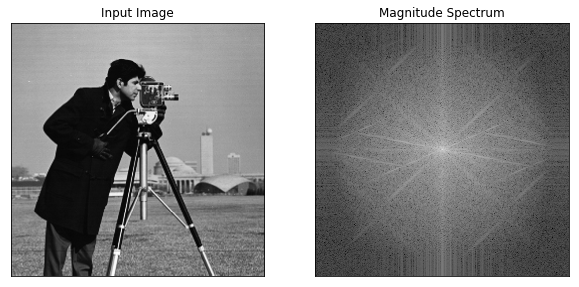

In [29]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import data
from skimage.draw import circle,set_color

img = data.camera()
img_float32 = np.float32(img)
print('Shape of original image:',img_float32.shape)
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
# Now once you got the result, zero frequency component 
# (DC component) will be at top left corner. 
# If you want to bring it to center, you need
# to shift the result by \frac{N}{2} in both the directions. 
# This is simply done by the function, np.fft.fftshift().
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()         

### numpy.fft.fftshift

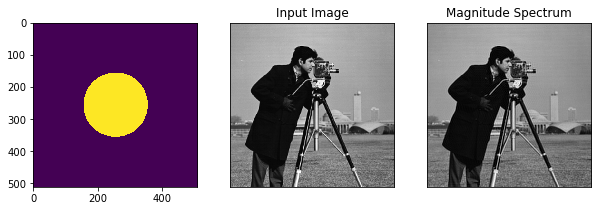

In [27]:

fig = plt.figure(figsize=(10,8))
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # center
flt_size = 15

mask_circle = np.zeros((rows, cols, 2), np.uint8)
rr,cc = circle(crow,ccol, 100)
mask_circle[rr,cc]=1

new_shift = dft_shift*mask_circle
new_ishift = np.fft.ifftshift(new_shift)
img_back = cv2.idft(new_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(131)
plt.imshow(mask_circle[:,:,0])
plt.subplot(132)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

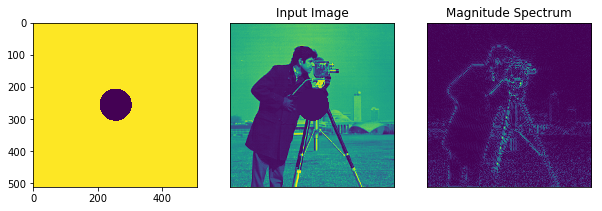

In [41]:
#Make High Pass Filter(HPF)
fig = plt.figure(figsize=(10,8))
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # center
flt_size = 15
# create a mask first, center circle is 0, remaining all ones
mask_circle = np.ones((rows, cols, 2), np.uint8)
rr,cc = circle(crow,ccol,50)

mask_circle[rr,cc]=0
# apply filter
new_shift = dft_shift*mask_circle
new_ishift = np.fft.ifftshift(new_shift)
img_back = cv2.idft(new_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(131)
plt.imshow(mask_circle[:,:,0])
plt.subplot(132)
plt.imshow(img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(img_back)
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

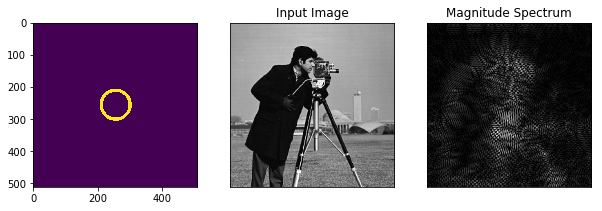

In [11]:
#Make Band Pass Filter
fig = plt.figure(figsize=(10,8))
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # center
flt_size = 15
# create a mask first, inner circle is 0, outer circle is 1, remaining all zeros
mask_circle = np.zeros((rows, cols, 2), np.uint8)
rrows, rcols = circle(crow, ccol, 100)
mask_circle[rrows, rcols] = 1
rrows, rcols = circle(crow, ccol, 90)
mask_circle[rrows, rcols] = 0
# apply filter
new_shift = dft_shift*mask_circle
new_ishift = np.fft.ifftshift(new_shift)
img_back = cv2.idft(new_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(131)
plt.imshow(mask_circle[:,:,0])
plt.subplot(132)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

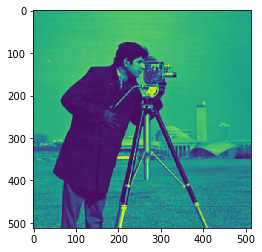

In [12]:
#wavelet correction
import numpy as np
from matplotlib import pyplot as plt
from skimage import data
from sklearn.preprocessing import MinMaxScaler 
import pywt

img = data.camera()


imArray = np.float32(img)
imArray /= 255;

coeffs = pywt.wavedec2(imArray, 'haar')
coeffs_H = list(coeffs)  
coeffs_H[0] *= 0;  

imArray_H = pywt.waverec2(coeffs_H, 'haar')

plt.imshow(imArray_H,cmap='gray')
imArray = np.float32(img)
imArray /= 255;

coeffs=pywt.wavedec2(imArray, 'haar')
coeffs_H=list(coeffs)  
coeffs_H[0] *= 0;  

# reconstruction
imArray_H = pywt.waverec2(coeffs_H, 'haar')
plt.imshow(imArray_H)
plt.show()
